<h1><center> Taller 4 </center></h1>

<h2><center> Punto 1 </center></h2>

In [199]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [200]:
def cadena(X,Y,C):
    j=len(Y)
    i=len(X)
    ca=''
    while(C[i][j]>0 and i >= 0 and j >=0):
        if(C[i][j-1] == C[i][j]):
            j=j-1;
            continue;
        if(C[i-1][j] == C[i][j] ):
            i=i-1;
            continue;    
        val = Y[j-1]
        ca+=val;
        i=i-1;
        j=j-1;
    co =''
    for a in range(len(ca)-1,-1,-1):
        co+=ca[a];
    return co;
            
        

In [201]:
import numpy as np

global C

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    cad = cadena(X,Y,C)
    return C[len(X)-1,len(Y)-1], C,cad
    

def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

In [202]:
len_lcs, lcs_mat, lcs_cad = lcs('ABCBDAB','BDCABA')
print lcs_cad

BDAB


<h2><center> Punto 2 </center></h2>

<h2>Subestructura óptima</h2>
Recompensa:
$$r_i = \max_{1\leq i\leq n}(p_i+r_{n-i})$$

Implementación simple de arriba hacia abajo (top-down)

In [203]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [204]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]

In [205]:
sol = cut_rodR(p,8)
print sol

22


<center><h2> Punto 2.A </h2></center>

Implementación de arriba hacia abajo con memorización (memoization)

In [206]:
global C
global cadena

def memo_cut_rodTD(p, n):
    global C 
    global cadena
    cadena = np.zeros(0)
    #cadena = []
    C = np.zeros((n,2))
    indice=0
    r = [-1] * (n+1)
    sol = memo_cut_rodTD_aux(p,n,r)
    armar(n)
    return sol,cadena

def armar(n):
    global C
    global cadena
    val1 = C[n-1,0]
    val2 = C[n-1,1]
    if val1 == 0 or val2 == 0:
        val = max(C[n-1,0],C[n-1,1])
        cadena = np.insert(cadena,0,val)
        return
    else:
        armar(val1)
        armar(val2)
        return

def memo_cut_rodTD_aux(p,n,r):
    global C
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        posmayor = -1
        for i in range(1,n+1):
            val = p[i-1]+memo_cut_rodTD_aux(p,n-i,r);
            if(val > q):
                q=val
                C[n-1,0]=i
                C[n-1,1]=n-i
    r[n]=q
    return q

In [207]:
sol, mat = memo_cut_rodTD(p,4)
print sol
print mat

10
[ 2.  2.]


C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Implementación abajo hacia arriba (bottom-up) con memorización

In [208]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]

In [209]:
sol = memo_cut_rodBU(p,4)
print sol

10


<h2><center>Punto 2.B </center></h2>

<h3> Variando n </h3>

In [210]:
import random as rnd
import time

def alg1(n,p):
    results = []
    results.append(0)
    results.append(0)
    for x in range(2,n):
        tic = time.clock()
        cut_rodR(p,x)
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

def alg2(n,p):
    results = []
    results.append(0)
    results.append(0)
    for x in range(2,n):
        tic = time.clock()
        memo_cut_rodTD(p,x)
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

def alg3(n,p):
    results = []
    results.append(0)
    results.append(0)
    for x in range(2,n):
        tic = time.clock()
        memo_cut_rodBU(p,x)
        toc = time.clock()
        results.append((toc-tic)*1000000)
    return results




In [211]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]

C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


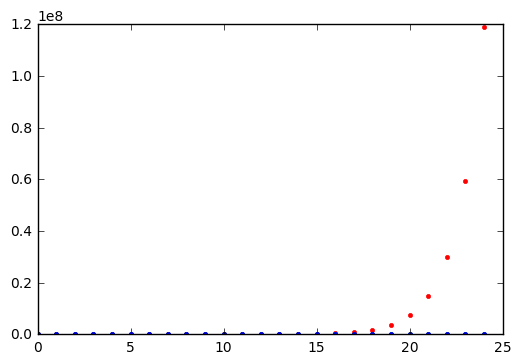

In [151]:
pl.clf()
n = 25
x = np.arange(n)
y = np.array(alg1(n,p))#Primer algoritmo 
pl.plot(x, y, 'k.',color='red')  
y = np.array(alg2(n,p)) #Segundo algoritmo TD
pl.plot(x, y, 'k.',color='green') 
y = np.array(alg3(n,p)) #Tercer algoritmo BU
pl.plot(x, y, 'k.',color='blue') 

<h3> Variando p </h3>

In [212]:
import random as rnd
import time

def algp1(n,p):
    results = []
    for x in range(n):
        np.random.shuffle(p)
        tic = time.clock()
        cut_rodR(p,n)
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

def algp2(n,p):
    results = []
    results.append(0)
    results.append(0)
    for x in range(2,n):
        np.random.shuffle(p)
        tic = time.clock()
        memo_cut_rodTD(p,n)
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

def algp3(n,p):
    results = []
    results.append(0)
    results.append(0)
    for x in range(2,n):
        np.random.shuffle(p)
        tic = time.clock()
        memo_cut_rodBU(p,n)
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


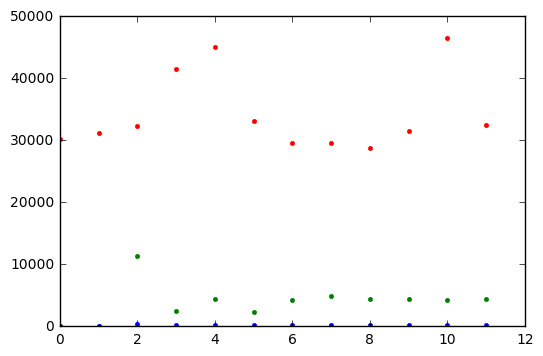

In [213]:
pl.clf()
n = 12
x = np.arange(n)
y = np.array(algp1(n,p))#Primer algoritmo 
pl.plot(x, y, 'k.',color='red')  
y = np.array(algp2(n,p)) #Segundo algoritmo TD
pl.plot(x, y, 'k.',color='green') 
y = np.array(algp3(n,p)) #Tercer algoritmo BU
pl.plot(x, y, 'k.',color='blue') 

<h2><center> Punto 3 </center><h2>

Las operaciones a realizar son sustitución, eliminación y adición

Se va a comparar caracter por caracter, se simulan las 3 acciones y se escoge la mejor

En caso de que el caracter que se esté comparando sea igual, se elige la distancia de la subcadena anterior

Si no es igual se elige el minimo entre las 3 operaciones

Esto se refleja en una matriz, de la longitud de la cadena 1 por la longitud de la cadena 2

y para cada sub cadena se calcula la distancia mínima, la respuesta está en la última posición de la matriz

La complejidad del algorítmo es de n^2


In [214]:
def distancia(cad1,cad2):
    a =  len(cad1)+1
    b =  len(cad2)+1
    C = np.zeros((a, b))
    
    for i in range(0,len(cad1)+1):
        C[i,0] = i
        
    for j in range(0,len(cad2)+1):
        C[0,j] = j    
        
    for i in range(1, len(cad1)+1):
        for j in range(1, len(cad2)+1):
            if (cad1[i-1] == cad2[j-1]):
                C[i,j] = C[i-1,j-1]
            else:
                C[i,j] = min( C[i-1,j-1] + 1 , C[i-1,j] + 1 , C[i,j-1] + 1 )
    return C[len(cad1),len(cad2)]



In [215]:
a = ['h','o','l','a']
b = ['o','l','a','f','o']
sol = distancia(a,b)
print sol

3.0


<h2><center> Punto 4 </center><h2>

In [216]:
import numpy as np

def rio(X):
    global C
    C = np.ones((len(X),len(X)))*-1
    #print C
    rio2(X,0,len(X)-1)
    return C
    

def rio2(x,i,j):
    global C
    #print "i ",i ," j ",j
    if C[i,j] == -1:
        if j - i == 1:
            C[i,j] = x[i,j]
            #print "retorna ",C[i,j]
            return C[i,j]
        
        valmin = x[i,j]
        for t in range(i+1,j):
            #print "llama a ", i,t, " y ", t,j
            val = rio2(x,i,t) + rio2(x,t,j)
            if(val < valmin):
                valmin = val
        C[i,j] = valmin
        #print "val minimo de ",i,j," es ",C[i,j]
        return C[i,j]
    
    else:
        #print "Ya se conoce ",C[i,j]
        return C[i,j]

In [217]:
import numpy as np
mat=np.matrix([[0,1,5,10,15],[-1,0,2,4,20],[-1,-1,0,3,30],[-1,-1,-1,0,5],[-1,-1,-1,-1,0]])
print mat
resp = rio(mat)
print resp

[[ 0  1  5 10 15]
 [-1  0  2  4 20]
 [-1 -1  0  3 30]
 [-1 -1 -1  0  5]
 [-1 -1 -1 -1  0]]
[[ -1.   1.   3.   5.  10.]
 [ -1.  -1.   2.   4.   9.]
 [ -1.  -1.  -1.   3.   8.]
 [ -1.  -1.  -1.  -1.   5.]
 [ -1.  -1.  -1.  -1.  -1.]]
